# Hird's Birds

In which I flagrantly parasitize Sarah's paper [*Comparative Gut Microbiota of 59 Neotropical Bird Species*](http://journal.frontiersin.org/article/10.3389/fmicb.2015.01403/full) for my own nefarious purposes.

In [1]:
%pylab inline
from SuchTree import SuchTree, SuchLinkedTrees, pearson
import pandas as pd
import numpy as np
import seaborn

Populating the interactive namespace from numpy and matplotlib


### Stealing, washing and loading the data

The data for Sarah's paper lives in a [FigShare repository](https://figshare.com/s/fe202600737e11e58a2906ec4bbcf141).

The FASTA files contains two duplicated entries, `Autoch72780X186_005960` and 
`Myitub72089X232_006148` that needed to be removed before the reads could be processed.

Sarah hasn't gotten back to me with the nice tree she built for this paper, so I 
cobbled one together from the [Global Phylogeny of Birds](http://birdtree.org/). Three of
the species names had to be switched to synonymous taxonomic listings.

The raw reads, the host tree, and the mapping file were then run through [`Shand`](https://github.com/ryneches/Shand), which build an alignment of unique reads using
[`clustal-omega`](http://www.clustal.org/omega/), a phylogeny using 
[`FastTree`](http://www.microbesonline.org/fasttree/), and a count table.

In [7]:
T1 = SuchTree( 'birds.tree' )
T2 = SuchTree( 'sarah_birds_unique_2_clustalo_fasttree.tree' )
links = pd.read_csv( 'sarah_birds_host_count_table.tsv', sep='\t', index_col='Host' )
links.index = map( lambda x : x.replace(' ','_'), links.index )

In [8]:
links.head()

,Amatza71825X040_000000,Amatza71825X040_000001,Amatza71825X040_000002,Amatza71825X040_000003,Amatza71825X040_000005,Amatza71825X040_000006,Amatza71825X040_000009,Amatza71825X040_000011,Amatza71825X040_000014,Amatza71825X040_000017,...,Xypsus71941X006_094834,Xypsus71993X168_002758,Xypsus71993X168_004833,Xypsus71993X168_006305,Xypsus71993X168_007733,Xypsus71993X168_019351,Xypsus71993X168_020474,Xypsus71993X168_022695,Xypsus71993X168_035747,Xypsus71993X168_050143
Amazilia_tzacatl,96,9531,13416,1,4,4261,1914,26094,27,55,...,0,0,0,0,0,0,0,0,0,0
Arremon_aurantiirostris,18,98,150,0,5,40,551,878,19,1,...,0,0,0,0,0,0,0,0,0,0
Arremonops_conirostris,0,21,41,31,0,11,152,173,15,0,...,0,0,0,0,0,0,0,0,0,0
Attila_spadiceus,4,2,24,0,4,1,227,115,19,0,...,0,0,0,0,0,0,0,0,0,0
Automolus_ochrolaemus,1,0,5,0,0,0,5,0,4,0,...,0,0,0,0,0,0,0,0,0,0


Now, we create a `SuchLinkedTrees` object, which connects the host and 
guest trees to the link matrix (`True` or `False` values derived from the
count matrix). This pre-indexes the table for fast access later, so creating
object takes a little while.

In [9]:
%%time
SLT = SuchLinkedTrees( T1, T2, links )

140006060453328 allocating columns in 3011505640
bulding default subset.
bulding default link list.
CPU times: user 9min 51s, sys: 848 ms, total: 9min 52s
Wall time: 9min 49s


Let's pick a random clade within the guest tree and have a look at it.

In [19]:
SLT.subset( 7063 )
print 'subset size  :', SLT.subset_size
print 'subset links :', SLT.subset_n_links
print 'link pairs   :', ( SLT.subset_n_links * ( SLT.subset_n_links -1 ) ) / 2

subset size  : 1247
subset links : 6223
link pairs   : 19359753


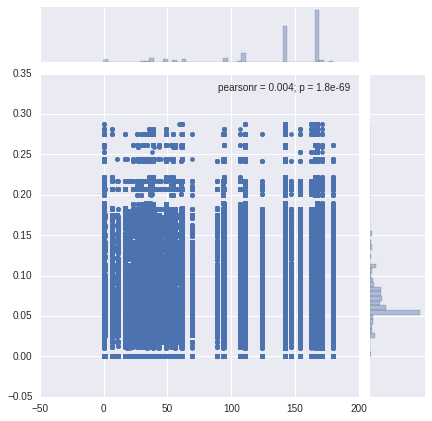

In [20]:
result = SLT.linked_distances()
seaborn.jointplot( result['TreeA'], result['TreeB'] )

That's a pretty big clade, actually. There are 19,359,753 pairs of links 
for which distances must be computed in each of the trees. 

In [21]:
result_sampled = SLT.sample_linked_distances(sigma=0.05, n=10000, buckets=10)
result_sampled

{'TreeA': array([   0.        ,  167.33294678,  142.4214325 , ...,   55.96265793,
         142.42144775,  142.4214325 ]),
 'TreeB': array([ 0.05355315,  0.07728969,  0.07194377, ...,  0.10965108,
         0.08275844,  0.10838196]),
 'deviation_a': 0.04419417306780815,
 'deviation_b': 0.0001068115234375,
 'n_pairs': 19359753,
 'n_samples': 3000000}

The sampling function converged after sampling 3,000,000 pairs, out of a 
possible 19,359,753, or about 15%. One must wonder, of course, how well
the sampled distribution of distances captures the full set.

So, here is the kernel density of the full set of distances...

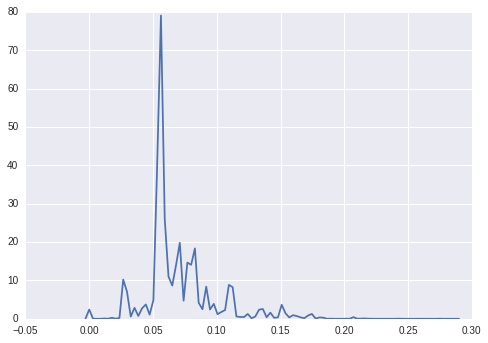

In [22]:
seaborn.kdeplot(result['TreeB'])

...and the sampled distances. Not terrible, I think.

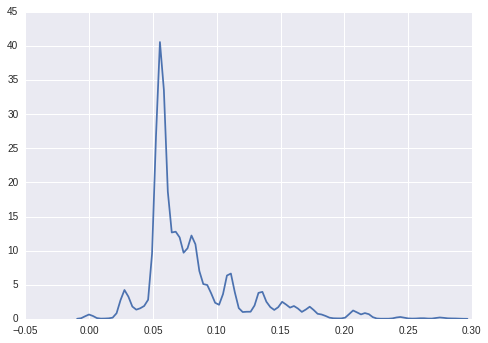

In [23]:
seaborn.kdeplot(result_sampled['TreeB'][100000:400000])

So, let's crunch the numbers for all the clades.

Well, I'm in a hurry to make something for lab meeting, so let's just look 
at the clades that are smaller than 400 leafs.

In [48]:
import pyprind

p = pyprind.ProgBar( len( list( SLT.TreeB.get_internal_nodes() ) ), monitor=True, title='sampling trees...' )

big_nodes = []
table = {}
for n,node in enumerate( SLT.TreeB.get_internal_nodes() ) :
    p.update()
    SLT.subset( node )
    if SLT.subset_size > 400 :
        big_nodes.append( node )
        #result = SLT.sample_linked_distances( sigma=0.05, n=1000, buckets=100)
        continue
    else :
        result = SLT.linked_distances()
    table[node] = { 'n_leafs'    : SLT.subset_size, 
                    'n_links'    : SLT.subset_n_links,
                    'n_pairs'    : result['n_pairs'],
                    'n_samples'  : result['n_samples'],
                    'deviatnon_a': result['deviation_a'],
                    'deviation_b': result['deviation_b'],
                    'r'          : pearson( result['TreeA'], result['TreeB'] ) }

sampling trees...
0%                          100%
[##############################] | ETA: 00:00:00
Total time elapsed: 00:30:02


In [85]:
print 'computed', len(table), 'clades'
print len(big_nodes), 'cades were skipped because they were too big.'
print ( len(table) - len(big_nodes) ) / float(len(table))

computed 76388 clades
1927 cades were skipped because they were too big.
0.974773524637


Computed correlations for 76,388 clades (97% of the clades).

1,927 cades were skipped because they were too big.

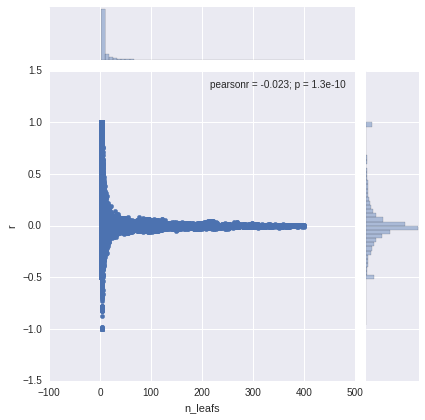

In [49]:
C = pd.DataFrame( table ).T
seaborn.jointplot( 'n_leafs', 'r', data=C )

Let's zoom in on the good ones...

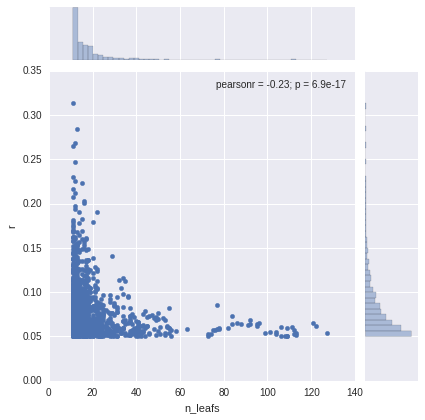

In [56]:
seaborn.jointplot( 'n_leafs', 'r', data=C.query('n_leafs > 10 and r > 0.05')  )

In [70]:
CC = C.query('n_leafs > 10 and r > 0.05').sort_values('r', ascending=False)
print CC.shape
CC.head()

(1256, 7)


,deviation_b,deviatnon_a,n_leafs,n_links,n_pairs,n_samples,r
67463,NaN,NaN,11.0,21.0,210.0,210.0,0.313125
67477,NaN,NaN,13.0,26.0,325.0,325.0,0.283790
47675,NaN,NaN,12.0,25.0,300.0,300.0,0.267909
19427,NaN,NaN,11.0,27.0,351.0,351.0,0.264996
102199,NaN,NaN,12.0,25.0,300.0,300.0,0.247379


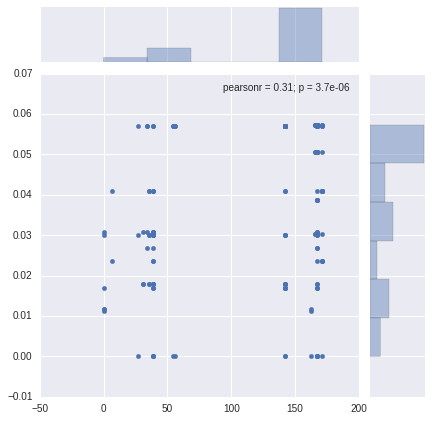

In [78]:
SLT.subset( 67463 )
result = SLT.linked_distances()
seaborn.jointplot( result['TreeA'], result['TreeB'] )

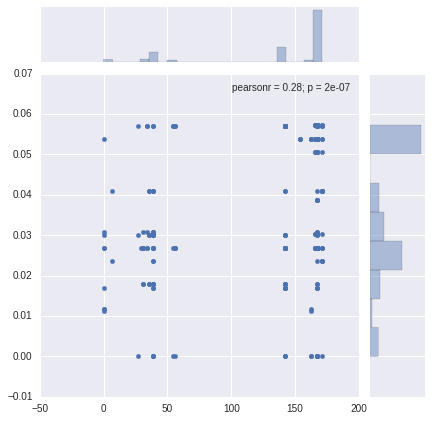

In [79]:
SLT.subset( 67477 )
result = SLT.linked_distances()
seaborn.jointplot( result['TreeA'], result['TreeB'] )

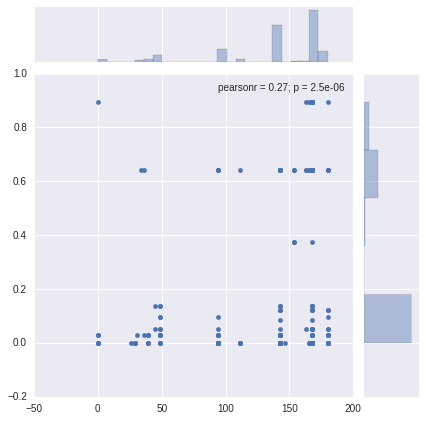

In [80]:
SLT.subset( 47675 )
result = SLT.linked_distances()
seaborn.jointplot( result['TreeA'], result['TreeB'] )

Pearson's *r* assumes the distributions are normal, but we saw
earlier that they are not. So, we should use a rank-order test,
like Kendall's $\tau$.

In [71]:
from scipy.stats import kendalltau, pearsonr

p = pyprind.ProgBar( CC.shape[0], monitor=True, title='resampling trees...' )

pearson_p   = {}
kendall_tau = {}
kendall_p   = {}

for n,node in enumerate( CC.index ) :
    SLT.subset(node)
    result = SLT.linked_distances()
    p_r,p_p = pearsonr(   result['TreeA'], result['TreeB'] )
    k_t,k_p = kendalltau( result['TreeA'], result['TreeB'] )
    pearson_p[node]  = p_p
    kendall_tau[node] = k_t
    kendall_p[node]   = k_p
    p.update()

CC['pearson_p'] = pd.Series(pearson_p)
CC['kendall_tau'] = pd.Series(kendall_tau)
CC['kendall_p'] = pd.Series(kendall_p)

resampling trees...
0%                          100%
[##############################] | ETA: 00:00:00
Total time elapsed: 00:03:36


In [72]:
CC.sort_values( 'kendall_tau', ascending=False, inplace=True )
CC.head()

,deviation_b,deviatnon_a,n_leafs,n_links,n_pairs,n_samples,r,pearson_p,kendall_tau,kendall_p
102199,NaN,NaN,12.0,25.0,300.0,300.0,0.247379,1.461595e-05,0.286272,1.420392e-13
19427,NaN,NaN,11.0,27.0,351.0,351.0,0.264996,4.721002e-07,0.278858,6.304481e-15
59641,NaN,NaN,12.0,38.0,703.0,703.0,0.225111,1.583268e-09,0.253798,7.590780e-24
113695,NaN,NaN,12.0,32.0,496.0,496.0,0.211792,1.945230e-06,0.237155,2.910762e-15
83151,NaN,NaN,11.0,31.0,465.0,465.0,0.175859,1.380015e-04,0.221637,9.188342e-13


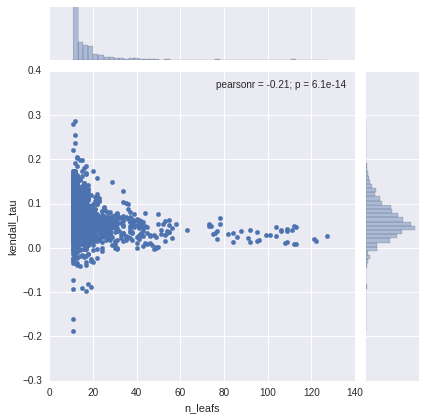

In [73]:
seaborn.jointplot( 'n_leafs', 'kendall_tau', data=CC )

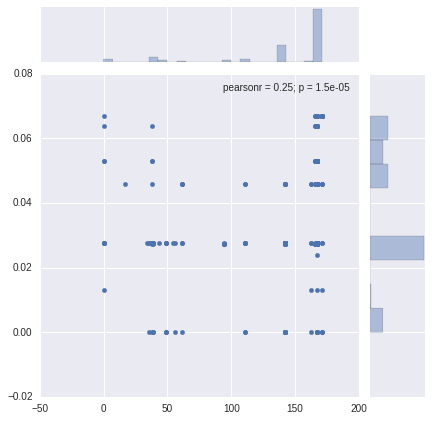

In [74]:
SLT.subset( 102199 )
result = SLT.linked_distances()
seaborn.jointplot( result['TreeA'], result['TreeB'] )

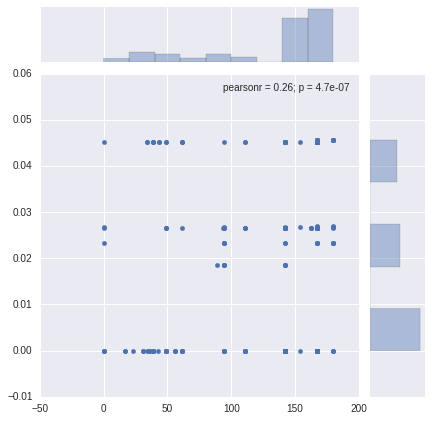

In [75]:
SLT.subset( 19427 )
result = SLT.linked_distances()
seaborn.jointplot( result['TreeA'], result['TreeB'] )

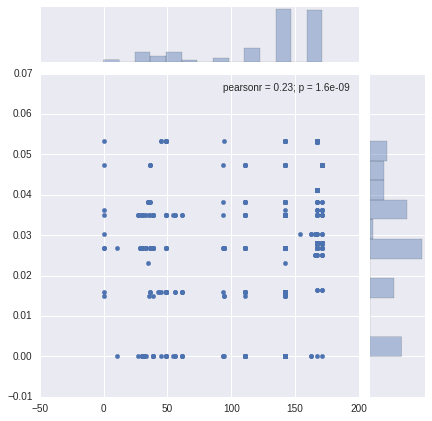

In [76]:
SLT.subset( 59641 )
result = SLT.linked_distances()
seaborn.jointplot( result['TreeA'], result['TreeB'] )

## Conclusion

If there is any cospeciation between birds and their gut bacteria, 
it's a pretty messy relationship.